In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 99)
pd.set_option('display.max_columns', 99)

In [459]:
df = pd.read_csv('wm_project.csv')

In [460]:
df.head()

,id,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,hit,decade
0,1,The Continental Walk,The Rollers,spotify:track:00Bu7AiNb06604KMuYTQAi,0.603,0.732,0,-5.647,1,0.0372,0.807,0.000000,0.0993,0.802,105.425,144000,3,31.93079,6,1.0,60s
1,2,Two Lovers,Mary Wells,spotify:track:00CmjeeHvAVKvx3tcIiZTy,0.678,0.405,2,-16.965,1,0.0304,0.426,0.000000,0.1090,0.960,105.902,167000,4,29.18796,8,1.0,60s
2,3,If I Knew,Nat King Cole,spotify:track:00Vwp9jQUs52JOnbbLaz5e,0.371,0.386,1,-9.238,1,0.0308,0.708,0.000467,0.0787,0.169,80.207,168000,4,57.12898,7,1.0,60s
3,4,"Lara's Theme from ""Dr. Zhivago""",Roger Williams,spotify:track:00YhuN9oOmXUyLQiHjXPxt,0.361,0.280,7,-13.422,1,0.0294,0.821,0.435000,0.1440,0.213,82.298,160000,3,38.22192,8,1.0,60s
4,5,Say Wonderful Things,Patti Page,spotify:track:010BIyGminG03GMg8afVAq,0.490,0.440,3,-9.387,1,0.0321,0.874,0.000000,0.3370,0.426,109.329,140000,3,21.83825,7,1.0,60s


In [461]:
df.shape

(40886, 21)

<div class="alert alert-block alert-info">
This dataset has 40886 observations and 21 variables.
</div>

# Data Cleaning

In [462]:
df.isna().sum()/df.shape[0]

id                  0.0000
track               0.0000
artist              0.0000
uri                 0.0000
danceability        0.0000
energy              0.0000
key                 0.0000
loudness            0.0000
mode                0.0000
speechiness         0.0000
acousticness        0.0000
instrumentalness    0.0000
liveness            0.0000
valence             0.0000
tempo               0.0000
duration_ms         0.0000
time_signature      0.0000
chorus_hit          0.0000
sections            0.0000
hit                 0.1817
decade              0.0000
dtype: float64

<div class="alert alert-block alert-info">
I will use only the observations with not-null [hit] value to build my model. The test will be predicted later. 
</div>

In [463]:
# Take only the observations with hit as traning dataset, the rest as test dataset
train = df[df.hit.notnull()]
test = df[df.hit.isna()]

In [464]:
train.shape

(33457, 21)

<div class="alert alert-block alert-info">
Now the dataset is down to 33457 observations and 21 variables.
</div>

# EDA

In [465]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33457 entries, 0 to 33456
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                33457 non-null  int64  
 1   track             33457 non-null  object 
 2   artist            33457 non-null  object 
 3   uri               33457 non-null  object 
 4   danceability      33457 non-null  float64
 5   energy            33457 non-null  float64
 6   key               33457 non-null  int64  
 7   loudness          33457 non-null  float64
 8   mode              33457 non-null  int64  
 9   speechiness       33457 non-null  float64
 10  acousticness      33457 non-null  float64
 11  instrumentalness  33457 non-null  float64
 12  liveness          33457 non-null  float64
 13  valence           33457 non-null  float64
 14  tempo             33457 non-null  float64
 15  duration_ms       33457 non-null  int64  
 16  time_signature    33457 non-null  int64 

In [466]:
# track
round(train['track'].nunique()/df.shape[0],2)

0.73

In [467]:
# artist
round(train['artist'].nunique()/df.shape[0],2)

0.26

In [468]:
# uri
round(train['uri'].nunique()/df.shape[0],2)

0.81

<div class="alert alert-block alert-info">
Above 3 variables <b>track</b>, <b>artist</b> and <b>uri</b> have too many levels which won't help with building a effective model. I will drop those features.
</div>

In [469]:
# danceability

<AxesSubplot:xlabel='danceability', ylabel='Density'>

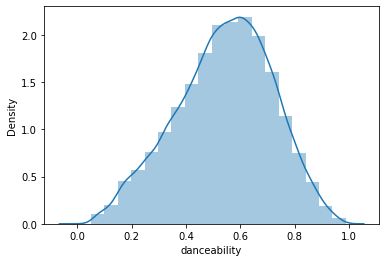

In [470]:
sns.distplot(train.danceability, 20)

<AxesSubplot:xlabel='hit', ylabel='danceability'>

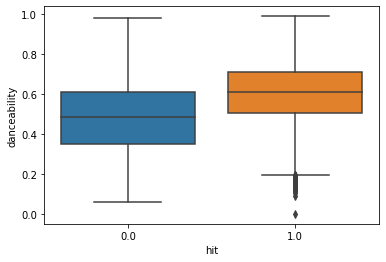

In [471]:
sns.boxplot(x="hit", y="danceability", data=train)

<div class="alert alert-block alert-info">
Hit songs on average have relatively higher danceability.
</div>

In [472]:
# energy

<AxesSubplot:xlabel='energy', ylabel='Density'>

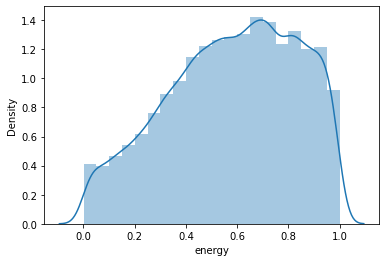

In [473]:
sns.distplot(train.energy, 20)

<AxesSubplot:xlabel='hit', ylabel='energy'>

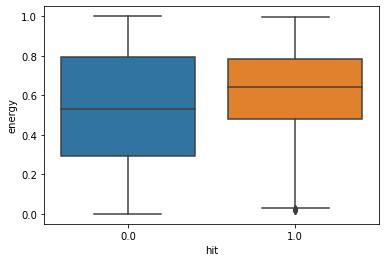

In [474]:
sns.boxplot(x="hit", y="energy", data=train)

<div class="alert alert-block alert-info">
Hit songs on average have higher energy. Their distribution of energy is denser between around 0.5-0.8.
</div>

In [475]:
# key

<AxesSubplot:xlabel='key'>

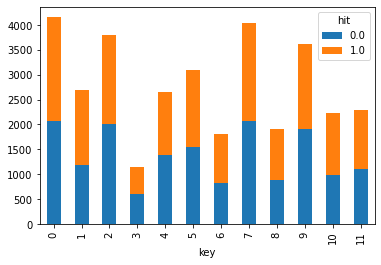

In [476]:
pd.crosstab(train['key'], train['hit']).plot(kind='bar', stacked=True)

<div class="alert alert-block alert-info">
Hit/Not-Hit distribution looks similar among different keys, which might lead to Key as a feature having no enough predictive power.
</div>

In [477]:
# loudness

<AxesSubplot:xlabel='loudness', ylabel='Density'>

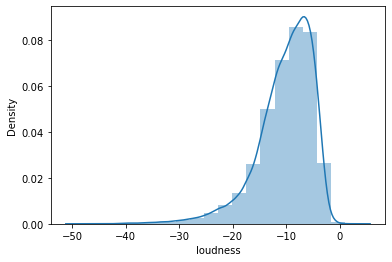

In [478]:
sns.distplot(train.loudness, 20)

<AxesSubplot:xlabel='hit', ylabel='loudness'>

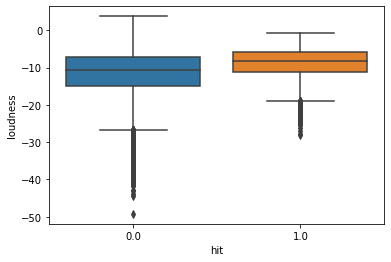

In [479]:
sns.boxplot(x="hit", y="loudness", data=train)

<div class="alert alert-block alert-info">
Hit songs on average are louder
</div>

In [480]:
# mode

<AxesSubplot:xlabel='mode'>

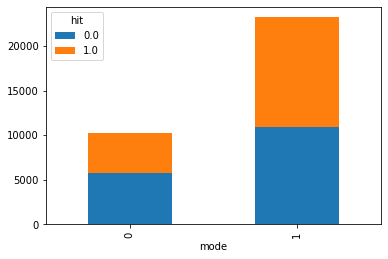

In [481]:
pd.crosstab(train['mode'], train['hit']).plot(kind='bar', stacked=True)

<div class="alert alert-block alert-info">
There are higher percentage of hit songs in Major track (mode=1)
</div>

In [482]:
# speechiness

<AxesSubplot:xlabel='hit', ylabel='speechiness'>

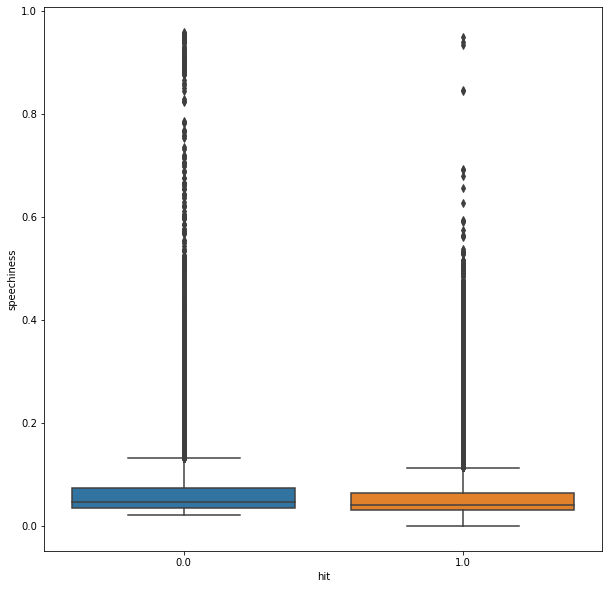

In [483]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="hit", y="speechiness", data=train,ax=ax)

<AxesSubplot:xlabel='speechiness', ylabel='Density'>

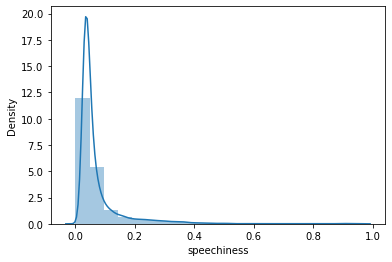

In [484]:
sns.distplot(train.speechiness, 20)

<div class="alert alert-block alert-info">
Overall songs have low speechiness level. Hit songs on average have even lower speechiness level compared with non-hit songs.
</div>

In [485]:
# acousticness

<AxesSubplot:xlabel='acousticness', ylabel='Density'>

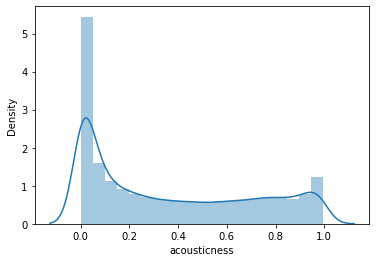

In [486]:
sns.distplot(train.acousticness, 20)

<AxesSubplot:xlabel='hit', ylabel='acousticness'>

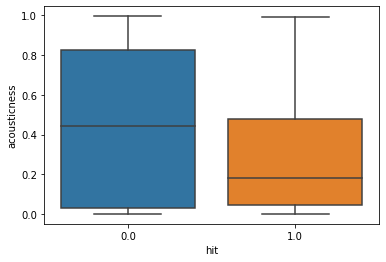

In [487]:
sns.boxplot(x="hit", y="acousticness", data=train)

<div class="alert alert-block alert-info">
Hit songs have on average lower acousticness level.
</div>

In [488]:
# instrumentalness

<AxesSubplot:xlabel='instrumentalness', ylabel='Density'>

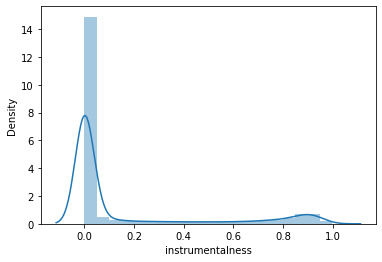

In [489]:
sns.distplot(train.instrumentalness, 20)

<AxesSubplot:xlabel='hit', ylabel='instrumentalness'>

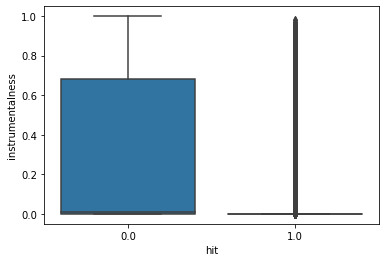

In [490]:
sns.boxplot(x="hit", y="instrumentalness", data=train)

In [491]:
train.groupby('hit')['instrumentalness'].mean()

hit
0.0    0.279190
1.0    0.030187
Name: instrumentalness, dtype: float64

<div class="alert alert-block alert-info">
Hit songs have more skewed distribution of instrumentalness while non-hit songs are mostly distributed around 0-0.5 instrumentalness.
</div>

In [492]:
# liveness

<AxesSubplot:xlabel='liveness', ylabel='Density'>

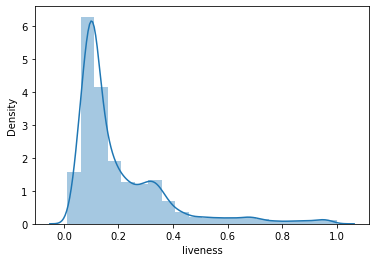

In [493]:
sns.distplot(train.liveness, 20)

<AxesSubplot:xlabel='hit', ylabel='liveness'>

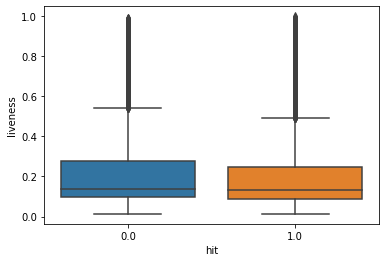

In [494]:
sns.boxplot(x="hit", y="liveness", data=train)

In [495]:
train.groupby('hit')['liveness'].mean()

hit
0.0    0.211887
1.0    0.192025
Name: liveness, dtype: float64

<div class="alert alert-block alert-info">
Hit songs have lower level of liveness
</div>

In [496]:
# valence

<AxesSubplot:xlabel='valence', ylabel='Density'>

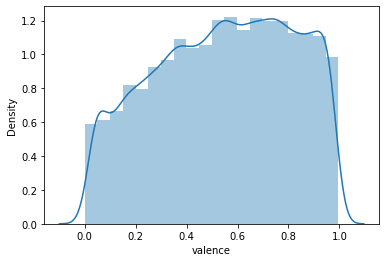

In [497]:
sns.distplot(train.valence, 20)

<AxesSubplot:xlabel='hit', ylabel='valence'>

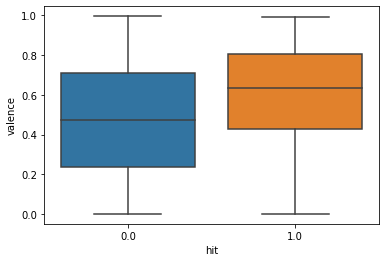

In [498]:
sns.boxplot(x="hit", y="valence", data=train)

<div class="alert alert-block alert-info">
Hit songs have higher level of valence on average
</div>

In [499]:
# tempo

<AxesSubplot:xlabel='tempo', ylabel='Density'>

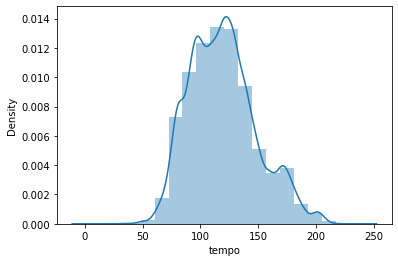

In [500]:
sns.distplot(train.tempo, 20)

<AxesSubplot:xlabel='hit', ylabel='tempo'>

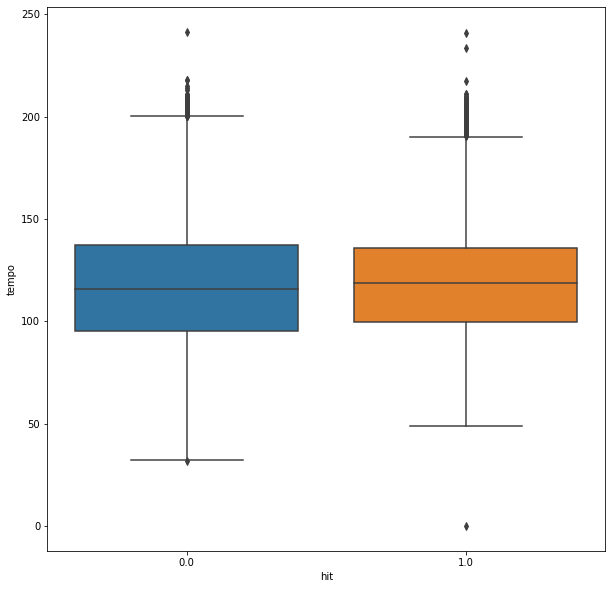

In [501]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="hit", y="tempo", data=train,ax=ax)

In [502]:
train.groupby('hit')['tempo'].mean()

hit
0.0    118.332678
1.0    120.294403
Name: tempo, dtype: float64

<div class="alert alert-block alert-info">
Hit songs have higher level of tempo on average
</div>

In [503]:
# duration_ms

<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

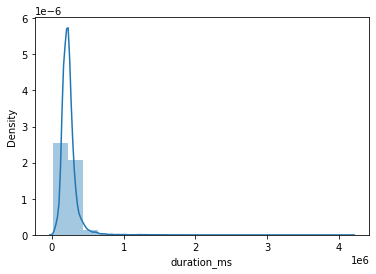

In [504]:
sns.distplot(train.duration_ms, 20)

<AxesSubplot:xlabel='hit', ylabel='duration_ms'>

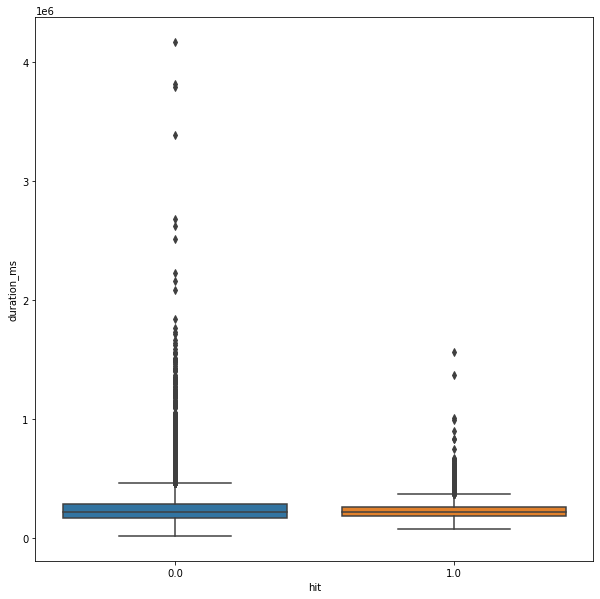

In [505]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="hit", y="duration_ms", data=train, ax=ax)

In [506]:
train.groupby('hit')['duration_ms'].mean()

hit
0.0    243868.588972
1.0    225525.853369
Name: duration_ms, dtype: float64

<div class="alert alert-block alert-info">
Hit songs on average is shorter
</div>

In [507]:
# time_signature

In [508]:
train.time_signature.value_counts()

4    29574
3     3091
5      481
1      309
0        2
Name: time_signature, dtype: int64

<AxesSubplot:xlabel='time_signature'>

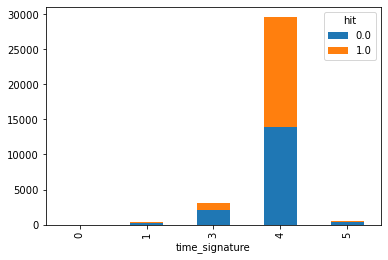

In [509]:
pd.crosstab(train['time_signature'], train['hit']).plot(kind='bar', stacked=True)

<div class="alert alert-block alert-info">
Most songs have 4 as time_signature, and time_signature=4 has a highest percentage of hit songs.
</div>

In [510]:
# chorus_hit

<AxesSubplot:xlabel='chorus_hit', ylabel='Density'>

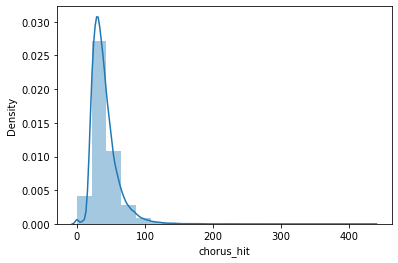

In [511]:
sns.distplot(train.chorus_hit, 20)

<AxesSubplot:xlabel='hit', ylabel='chorus_hit'>

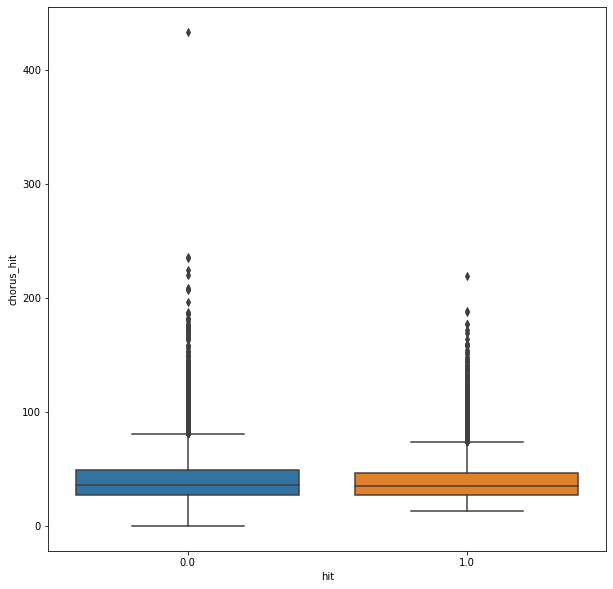

In [512]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="hit", y="chorus_hit", data=train,ax=ax)

In [513]:
train.groupby('hit')['chorus_hit'].mean()

hit
0.0    40.883971
1.0    39.175063
Name: chorus_hit, dtype: float64

<div class="alert alert-block alert-info">
Hit songs on average have a smaller chorus_hit
</div>

In [514]:
# sections

In [515]:
train.sections.nunique()

79

<AxesSubplot:xlabel='sections'>

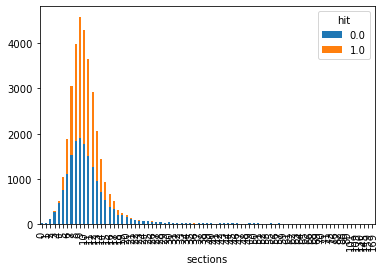

In [516]:
pd.crosstab(train['sections'], train['hit']).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='hit', ylabel='sections'>

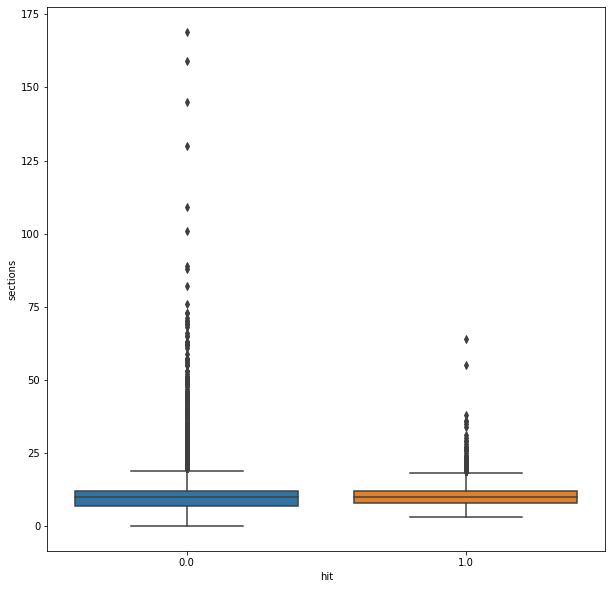

In [517]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="hit", y="sections", data=train,ax=ax)

In [518]:
train.groupby('hit')['sections'].mean()

hit
0.0    10.771069
1.0    10.158979
Name: sections, dtype: float64

<div class="alert alert-block alert-info">
It's better to take sections as a continuous numeric variable. Hit songs' sections have a more compact distribution where most of the value are between 0-75 sections, and hit songs have slightly lower number of sections.
</div>

In [519]:
# decade

In [520]:
train.decade.value_counts()

60s    7062
70s    6329
80s    5601
10s    5151
00s    4793
90s    4521
Name: decade, dtype: int64

<AxesSubplot:xlabel='decade'>

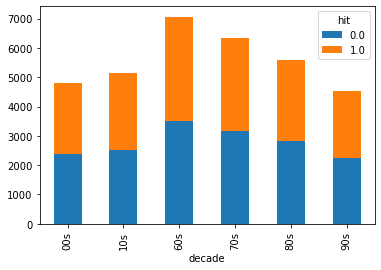

In [521]:
pd.crosstab(train['decade'], train['hit']).plot(kind='bar', stacked=True)

<div class="alert alert-block alert-info">
60s and 70s have higher percentage of hit songs.
</div>

# Feature Engineering

In [522]:
y = train.hit
X = train.loc[:, train.columns != 'hit']

<div class="alert alert-block alert-info">
As mentioned above, I will remove track, artist and uri.
</div>

In [523]:
del X['id']
del X['track']
del X['artist']
del X['uri']

In [524]:
num_col = ['danceability','energy','loudness','speechiness',
           'acousticness','instrumentalness','liveness','valence','tempo',
           'duration_ms','chorus_hit','sections']

In [525]:
cat_col = ['key','mode','time_signature','decade']
for x in cat_col:
    X[x] = X[x].astype('category')

<div class="alert alert-block alert-info">
One-hot-encoding for categorical variable
</div>

In [526]:
pd.get_dummies(X[cat_col])

,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,decade_00s,decade_10s,decade_60s,decade_70s,decade_80s,decade_90s
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33452,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
33453,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
33454,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
33455,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


In [527]:
X_encoded = pd.concat([pd.get_dummies(X[cat_col]), X[num_col]], axis=1)

# Feature Selection

In [528]:
train[train.hit == 1].shape[0]/df.shape[0] #40/60

0.4119992173360074

<div class="alert alert-block alert-info">
In this sample, hit is around 40% of the entire population, therefore I will be using 40/60 as the class_weight going forward.
</div>

<div class="alert alert-block alert-info">
Following I will use Boruta as my feature selection method. 
</div>

Boruta method is based on two idea:
- In Boruta, features do not compete among themselves. They compete with a randomized version of them.
- The threshold is defined as the highest feature importance recorded among the shadow features. A feature is useful only if it’s capable of doing better than the best randomized feature.

In [529]:
# Boruta

In [530]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [531]:
### initialize Boruta
forest = RandomForestClassifier(
    n_jobs = -1, 
    max_depth = 5,
    n_estimators=1000,
    criterion='entropy',
    class_weight={1:0.4,0:0.6},
    random_state=42)

boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)

### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X_encoded), np.array(y))
    
### print results
selected_features = X_encoded.columns[boruta.support_].to_list()
tbd_features = X_encoded.columns[boruta.support_weak_].to_list()
print('features selected:', selected_features)
print('features in consideration:', tbd_features)

features selected: ['mode_0', 'mode_1', 'time_signature_3', 'time_signature_4', 'decade_00s', 'decade_10s', 'decade_60s', 'decade_90s', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'chorus_hit', 'sections']
features in consideration: []


In [532]:
set(X_encoded.columns) - set(selected_features) 

{'decade_70s',
 'decade_80s',
 'key_0',
 'key_1',
 'key_10',
 'key_11',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'time_signature_0',
 'time_signature_1',
 'time_signature_5'}

<div class="alert alert-block alert-info">
I will remove above features as they are not informative.
</div>

In [533]:
X_encoded = X_encoded[selected_features]

# XGBOOST

In [534]:
# conda install -c anaconda py-xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [535]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [536]:
# define a timer to keep track on training time
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now()-start_time).total_seconds(), 3600)
        tmin,tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec,2)))

In [537]:
# defining a generic Function to give ROC_AUC Scores in table format for better readability
from sklearn.model_selection import cross_val_score
def crossvalscore(model):
    scores = cross_val_score(model,X_encoded,y,cv=5,scoring='roc_auc',n_jobs=-1) 
    acc = cross_val_score(model,X_encoded,y,cv=5,scoring='accuracy',n_jobs=-1)
    rand_scores = pd.DataFrame({
    'cv':range(1,6),
    'roc_auc score':scores,
    'accuracy score':acc
    })
    print('AUC :',rand_scores['roc_auc score'].mean())
    print('accuracy :',rand_scores['accuracy score'].mean())
    return rand_scores.sort_values(by='roc_auc score',ascending=False)

<div class="alert alert-block alert-info">
Build preliminary XGB
</div>

In [538]:
### initialize XGB
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            missing=None, 
                            seed=42,
                            eval_metric='aucpr')

In [539]:
### fit XGB
clf_xgb.fit(X_train,
            y_train,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            verbose=3,
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.77703
[3]	validation_0-aucpr:0.81777
[6]	validation_0-aucpr:0.83135
[9]	validation_0-aucpr:0.84171
[12]	validation_0-aucpr:0.84283
[15]	validation_0-aucpr:0.84432
[18]	validation_0-aucpr:0.84627
[21]	validation_0-aucpr:0.84743
[24]	validation_0-aucpr:0.84948
[27]	validation_0-aucpr:0.84909
[30]	validation_0-aucpr:0.85070
[33]	validation_0-aucpr:0.85045
[36]	validation_0-aucpr:0.84994
[39]	validation_0-aucpr:0.84961
[41]	validation_0-aucpr:0.84947


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='aucpr',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [540]:
crossvalscore(clf_xgb)

AUC : 0.8500576333181062
accuracy : 0.7673755585895105


,cv,roc_auc score,accuracy score
3,4,0.906069,0.831565
4,5,0.855175,0.784636
2,3,0.847343,0.769990
1,2,0.833918,0.714883
0,1,0.807783,0.735804


<div class="alert alert-block alert-info">
Optimize XGB by tuning hyperparameter
</div>

In [541]:
### Hyperparameter Optimization for Xgboost with RandomizedSearchCV
param_grid_3 = {
    'max_depth':[25], 
    'learning_rate':[0.095], 
    'gamma':[5], 
    'reg_lambda':[72], 
    'scale_pos_weight':[1]} 

In [542]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(clf_xgb, 
                                  param_distributions=param_grid_3, 
                                   n_iter=5, 
                                   scoring='roc_auc',
                                   n_jobs=-1, 
                                   cv=5,
                                   verbose=3)

In [543]:
from datetime import datetime
start_time = timer(None)
random_search.fit(X_encoded,y)
timer(start_time)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.0s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.2s finished



 Time taken: 0 hours 0 minutes and 18.19 seconds.


In [544]:
### output optimized parameters
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='aucpr',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.095, max_delta_step=0,
              max_depth=25, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=72,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [545]:
### initialize and fit the model with optimized parameters
clf_xgb_optimized = xgb.XGBClassifier(seed=42,
                                      objective='binary:logistic', 
                                      max_depth=25,
                                      gamma=5,
                                      learning_rate=0.095,
                                      reg_lambda=72,
                                      scale_pos_weight=1)

In [546]:
clf_xgb_optimized.fit(X_train,
                     y_train,
                     early_stopping_rounds=10,
                     eval_metric='aucpr',
                     eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.78188
[1]	validation_0-aucpr:0.78880
[2]	validation_0-aucpr:0.79393
[3]	validation_0-aucpr:0.79731
[4]	validation_0-aucpr:0.80143
[5]	validation_0-aucpr:0.80617
[6]	validation_0-aucpr:0.80940
[7]	validation_0-aucpr:0.81174
[8]	validation_0-aucpr:0.81844
[9]	validation_0-aucpr:0.81984
[10]	validation_0-aucpr:0.82063
[11]	validation_0-aucpr:0.82258
[12]	validation_0-aucpr:0.83089
[13]	validation_0-aucpr:0.83150
[14]	validation_0-aucpr:0.83350
[15]	validation_0-aucpr:0.83578
[16]	validation_0-aucpr:0.83579
[17]	validation_0-aucpr:0.83709
[18]	validation_0-aucpr:0.83746
[19]	validation_0-aucpr:0.83857
[20]	validation_0-aucpr:0.84137
[21]	validation_0-aucpr:0.84214
[22]	validation_0-aucpr:0.84343
[23]	validation_0-aucpr:0.84537
[24]	validation_0-aucpr:0.84648
[25]	validation_0-aucpr:0.84676
[26]	validation_0-aucpr:0.84748
[27]	validation_0-aucpr:0.84830
[28]	validation_0-aucpr:0.84922
[29]	validation_0-aucpr:0.84977
[30]	validation_0-aucpr:0.85142
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.095, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=72, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [547]:
crossvalscore(clf_xgb_optimized)

AUC : 0.8577090814444148
accuracy : 0.7696178985555086


,cv,roc_auc score,accuracy score
3,4,0.905883,0.835451
4,5,0.872898,0.799880
2,3,0.862594,0.779555
1,2,0.830872,0.696653
0,1,0.816298,0.736551


<div class="alert alert-block alert-info">
Plot feature importance from optimized XGB
</div>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

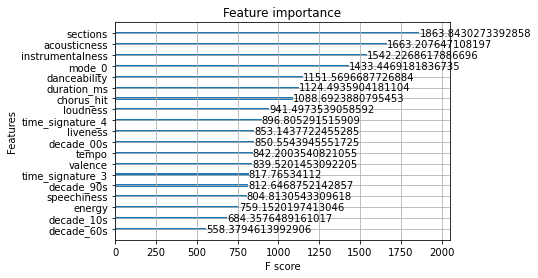

In [548]:
# Cover. The number of times a feature is used to split the data across all 
# trees weighted by the number of training data points that go through those 
# splits.
xgb.plot_importance(clf_xgb_optimized, importance_type="cover")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

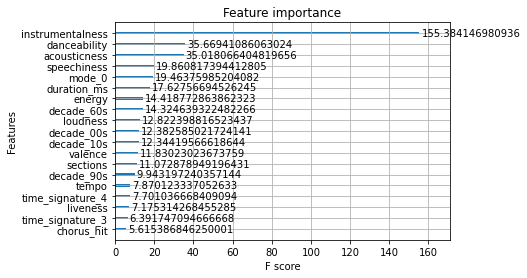

In [549]:
# Gain. The average training loss reduction gained when using a feature for 
# splitting.
xgb.plot_importance(clf_xgb_optimized, importance_type="gain")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

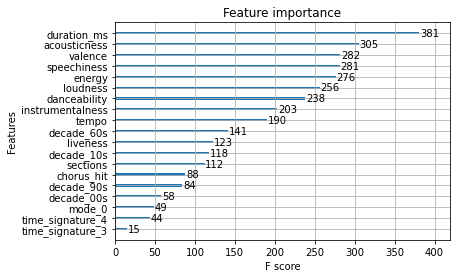

In [550]:
# Weight. The number of times a feature is used to split the 
# data across al trees
xgb.plot_importance(clf_xgb_optimized, importance_type="weight")

In [551]:
# Calibrate Predict_proba with CalibratedClassifierCV

In [552]:
from sklearn.calibration import CalibratedClassifierCV
calibrated = CalibratedClassifierCV(clf_xgb_optimized, method='isotonic', cv='prefit')

In [553]:
### fit the calibrated model with test dataset
calibrated = calibrated.fit(X_test, y_test)

In [554]:
### calibrated probability
probability = (calibrated.predict_proba(X_encoded))

# Prediction

In [555]:
# Handle test dataset
X_test = test.loc[:, test.columns != 'hit']

del X_test['id']
del X_test['track']
del X_test['artist']
del X_test['uri']

for x in cat_col:
    X_test[x] = X_test[x].astype('category')

X_test_encoded = pd.concat([pd.get_dummies(X_test[cat_col]), X_test[num_col]], axis=1)
X_test_encoded = X_test_encoded[selected_features]

In [556]:
pred = pd.DataFrame(calibrated.predict_proba(X_test_encoded))[1]
pred_v1=pd.concat([test.id.reset_index(drop=True).astype('str'),pred],axis=1, ignore_index=True)
pred_v1.columns = ['id', 'probability']

<div class="alert alert-block alert-info">
Predicted value for the observations with missing hit:
</div>

In [557]:
pred_v1

,id,probability
0,33458,0.490153
1,33459,0.890359
2,33460,0.802867
3,33461,0.855491
4,33462,0.464286
...,...,...
7424,40882,0.953333
7425,40883,0.855491
7426,40884,0.625000
7427,40885,0.946429
